In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bsplines_model import Bsplines_bases

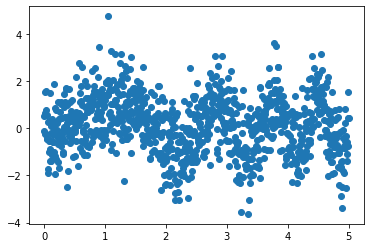

In [8]:
np.random.seed(42)
x_list = np.linspace(0,4.99999,1000)
y_list = np.sin(x_list**2) + np.random.normal(loc=0.0, scale=1.0, size= len(x_list))

plt.scatter(x_list, y_list)

In [11]:
phi_matrix = np.empty((0,8))
knots = [0,1,2,3,4,5]

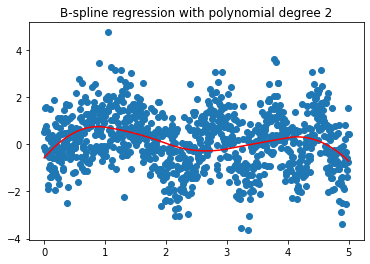

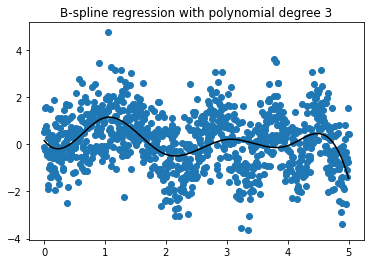

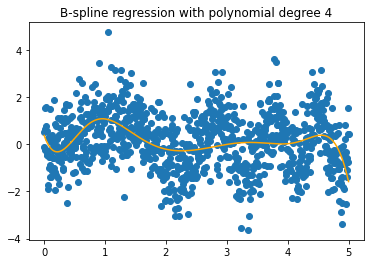

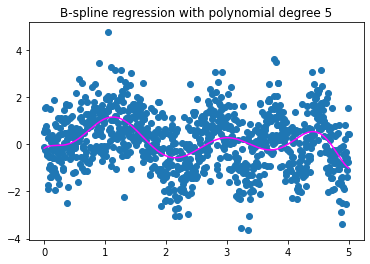

In [25]:
degrees = [2,3,4,5]
colors = ['red', 'black', 'orange', 'magenta']


for i in range(len(degrees)):
    degree = degrees[i]
    color = colors[i]
    phi_matrix = np.empty((0,(len(knots)+2*degree -(degree+1))))
    
    #construct the phi matrix
    for j in x_list:
        BS = Bsplines_bases(j, knots, spline_degree=degree)
        BS_val = BS.collect_bases()
        phi_matrix = np.vstack((phi_matrix, BS_val))
        
    # find optimal parameters according to least-squares reg formula
    theta_hat = np.linalg.inv(phi_matrix.T @ phi_matrix) @ (phi_matrix.T @ y_list)
    plt.scatter(x_list, y_list)
    plt.plot(x_list, phi_matrix@theta_hat, c=color)
    plt.title('B-spline regression with polynomial degree %s'%degree)
    plt.show()
